In [ ]:
X=[]
y=[]
IMG_SIZE=150
train_dir="D:\\flowers"
class_dir=

In [ ]:
# Loop through each person in the training set
    for class_dir in os.listdir(train_dir):
        if not os.path.isdir(os.path.join(train_dir, class_dir)):
            continue

        # Loop through each training image for the current person
        for img_path in image_files_in_folder(os.path.join(train_dir, class_dir)):
            image = face_recognition.load_image_file(img_path)
            face_bounding_boxes = face_recognition.face_locations(image)

            if len(face_bounding_boxes) != 1:
                # If there are no people (or too many people) in a training image, skip the image.
                if verbose:
                    print("Image {} not suitable for training: {}".format(img_path, "Didn't find a face" if len(face_bounding_boxes) < 1 else "Found more than one face"))
            else:
                # Add face encoding for current image to the training set
                X.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
                y.append(class_dir)
                print(X)
                print(y)

In [22]:
import cv2
import numpy
import glob
import pylab as plt

folders = glob.glob('D:\\flowers\\*')
imagenames__list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames__list.append(f)

read_images = []        

for image in imagenames__list:
    read_images.append(cv2.imread(image,cv2.COLOR_BGR2RGB ))

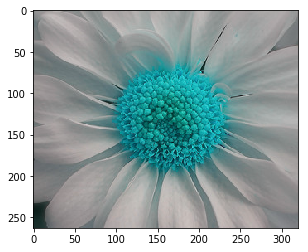

In [24]:
plt.imshow(read_images[0])

In [ ]:
im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
cv2.COLOR_BGR2RGB
cv2.IMREAD_GRAYSCALE

Image.fromarray(im_rgb).save('data/dst/lena_rgb_pillow.jpg')

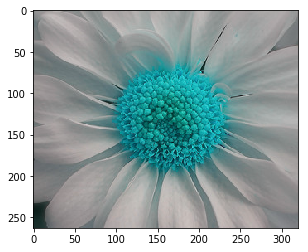

In [23]:
X=[]
y=[]

In [ ]:
import glob
import cv2 as cv

path = glob.glob("/*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D


Using TensorFlow backend.


In [24]:
#3 ) Modelling
#3.1 ) Building the ConvNet Model
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dense(5, activation = "softmax"))


In [25]:
# Compiling the CNN
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 96)        83040     
__________

In [26]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator


In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [28]:
training_set = train_datagen.flow_from_directory('D:\\flowers\\TRAIN',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('D:\\flowers\\Test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 4048 images belonging to 5 classes.
Found 341 images belonging to 5 classes.


In [ ]:
model.fit_generator(training_set,
                         samples_per_epoch = 4048,
                         nb_epoch = 10,
                         validation_data = test_set,
                         nb_val_samples = 341)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=126, epochs=10, validation_steps=341)`
  """


Epoch 1/10
126/126 [==============================] - 914s 7s/step - loss: 1.2943 - acc: 0.4459 - val_loss: 1.0753 - val_acc: 0.5748
Epoch 2/10
126/126 [==============================] - 13206s 105s/step - loss: 1.0307 - acc: 0.5895 - val_loss: 1.0050 - val_acc: 0.5894
Epoch 3/10
126/126 [==============================] - 937s 7s/step - loss: 0.9256 - acc: 0.6406 - val_loss: 0.7852 - val_acc: 0.6950
Epoch 4/10
126/126 [==============================] - 3293s 26s/step - loss: 0.8508 - acc: 0.6719 - val_loss: 0.7912 - val_acc: 0.7126
Epoch 5/10
 30/126 [======>.......................] - ETA: 6:39 - loss: 0.8069 - acc: 0.6854